In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [5]:
df = pd.read_csv('hotel_bookings.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.head(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [8]:
#combining columns to form date

df["date"]=df["arrival_date_year"].astype(str) + "/" + df["arrival_date_month"] + "/"+ df["arrival_date_day_of_month"].astype(str)

In [9]:
#convert date column to date type

df['date'] = pd.to_datetime(df['date'])

In [10]:
#columns to drop 

to_drop=['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','reservation_status_date', 'reservation_status','date']

for column in df.columns:
    if column in to_drop:
        df=df.drop(column,axis=1)

In [11]:
#drop null rows for column "Country"

df.dropna(subset=['country','children'],inplace=True)

In [12]:
#columns to encode

to_encode = ["deposit_type", "customer_type", "hotel" , "meal", 'country','market_segment',"distribution_channel",'assigned_room_type', 'reserved_room_type']

for column in df.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(df[column].astype(str))
        df[column]=le.transform(df[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)


{'City Hotel': 0, 'Resort Hotel': 1}
{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
{'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9, 'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BOL': 24, 'BRA': 25, 'BRB': 26, 'BWA': 27, 'CAF': 28, 'CHE': 29, 'CHL': 30, 'CHN': 31, 'CIV': 32, 'CMR': 33, 'CN': 34, 'COL': 35, 'COM': 36, 'CPV': 37, 'CRI': 38, 'CUB': 39, 'CYM': 40, 'CYP': 41, 'CZE': 42, 'DEU': 43, 'DJI': 44, 'DMA': 45, 'DNK': 46, 'DOM': 47, 'DZA': 48, 'ECU': 49, 'EGY': 50, 'ESP': 51, 'EST': 52, 'ETH': 53, 'FIN': 54, 'FJI': 55, 'FRA': 56, 'FRO': 57, 'GAB': 58, 'GBR': 59, 'GEO': 60, 'GGY': 61, 'GHA': 62, 'GIB': 63, 'GLP': 64, 'GNB': 65, 'GRC': 66, 'GTM': 67, 'GUY': 68, 'HKG': 69, 'HND': 70, 'HRV': 71, 'HUN': 72, 'IDN': 73, 'IMN': 74, 'IND': 75, 'IRL': 76, 'IRN': 77, 'IRQ': 78, 'ISL': 79, 'ISR': 80, 'ITA': 81, 'JAM': 82, 'JEY': 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  int32  
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   stays_in_weekend_nights         118898 non-null  int64  
 4   stays_in_week_nights            118898 non-null  int64  
 5   adults                          118898 non-null  int64  
 6   children                        118898 non-null  float64
 7   babies                          118898 non-null  int64  
 8   meal                            118898 non-null  int32  
 9   country                         118898 non-null  int32  
 10  market_segment                  118898 non-null  int32  
 11  distribution_channel            118898 non-null  int32  
 12  is_repeated_gues

In [14]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,0,0,2,0.0,0,0,135,...,2,3,0,NaN,NaN,0,2,0.0,0,0
1,1,0,737,0,0,2,0.0,0,0,135,...,2,4,0,NaN,NaN,0,2,0.0,0,0
2,1,0,7,0,1,1,0.0,0,0,59,...,2,0,0,NaN,NaN,0,2,75.0,0,0
3,1,0,13,0,1,1,0.0,0,0,59,...,0,0,0,304.0,NaN,0,2,75.0,0,0
4,1,0,14,0,2,2,0.0,0,0,59,...,0,0,0,240.0,NaN,0,2,98.0,0,1


In [15]:
#encoding both agent and company code

df['agent_encoded'] = df['agent'].notnull()
df['company_encoded'] = df['company'].notnull()
df["agent_encoded"] = df["agent_encoded"].astype(int)
df["company_encoded"] = df["company_encoded"].astype(int)
df=df.drop(['agent','company'],axis = 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  int32  
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   stays_in_weekend_nights         118898 non-null  int64  
 4   stays_in_week_nights            118898 non-null  int64  
 5   adults                          118898 non-null  int64  
 6   children                        118898 non-null  float64
 7   babies                          118898 non-null  int64  
 8   meal                            118898 non-null  int32  
 9   country                         118898 non-null  int32  
 10  market_segment                  118898 non-null  int32  
 11  distribution_channel            118898 non-null  int32  
 12  is_repeated_gues

In [31]:
column_list=list(df.columns)
column_list.remove('is_canceled')

In [32]:
# features
X = df[column_list]

# target
y = df['is_canceled']

In [24]:
from sklearn.model_selection import train_test_split
# split into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [80]:
from sklearn.model_selection import GridSearchCV
para = [{'max_iter':[1000]}] 
# clf=GridSearchCV(linear_model.LogisticRegression(solver = 'lbfgs'), param_grid=para, cv=5, scoring='r2') 
clf=linear_model.LogisticRegression(solver = 'lbfgs', max_iter = para[0]['max_iter'][0]) 
clf.fit(x_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [81]:
# Perform prediction on the test set using trained logistic regression model

from sklearn import metrics

y_pred = clf.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.7942809083263247


In [82]:
from sklearn import metrics

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

report = """
The evaluation report is:
Confusion Matrix:
{}
Accuracy: {}
Precision: {}
Recall: {} 
""".format(cf_matrix, accuracy, precision, recall)
print(report)


The evaluation report is:
Confusion Matrix:
[[13710  1262]
 [ 3630  5178]]
Accuracy: 0.7942809083263247
Precision: 0.8040372670807453
Recall: 0.587874659400545 



AUC: 0.8286958354656818


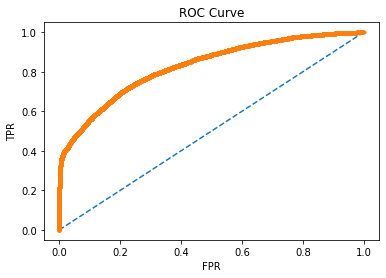

In [83]:
y_pred_prob = estimator.predict_proba(x_test)
# keep probabilities for the positive class only
y_pred_prob = y_pred_prob[:, 1]
# calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
# Calculate AUC
print('AUC:', metrics.roc_auc_score(y_test, y_pred_prob))

plt.plot([0, 1], [0, 1], ls = '--')
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()